# Import libraries

In [666]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load data 

In [668]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data preprocessing converting data from catagorical form to numerical in Species label three catagory are this code make them in [0,1,2] 

In [670]:
species_list = data['Species'].unique().tolist()  
data['Species'] = data['Species'].apply(lambda x: species_list.index(x))
X = data.drop(columns=['Species']).values
y = data['Species'].values


# 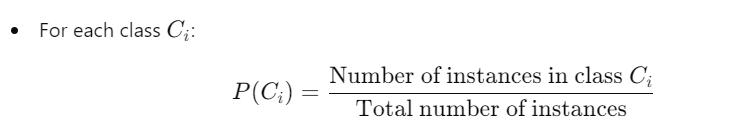
# Example like this
# 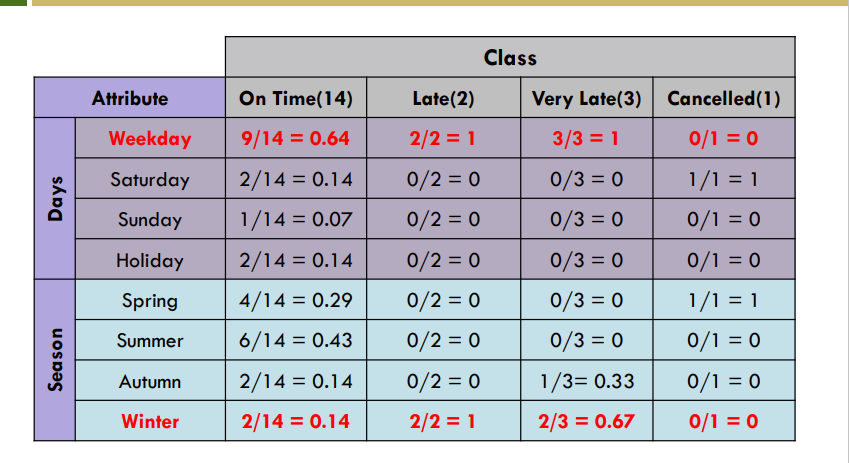
# The Picture is only for example 
# Calculating probabilities of each class

In [672]:
def calculate_prior(y):
    counts = np.bincount(y)  
    total_count = len(y)  
    prior = counts / total_count  
    return prior

# Using the gaussian_probability function in Naïve Bayes allows the classifier to leverage the Gaussian distribution's mathematical properties, making it effective for tasks involving Continuous Features.
# Gaussian_probability Calculation  

In [673]:
def gaussian_probability(x, mean, variance):
    exponent = np.exp(-((x - mean) ** 2) / (2 * variance))
    return (1 / np.sqrt(2 * np.pi * variance)) * exponent


# Group Data by Class: For each unique class label in y, the function selects the subset of X (the feature matrix) that belongs to that class.
# The calculate_statistics function computes the mean and variance for each feature (e.g., sepal length, petal width) across different classes (e.g., Setosa, Versicolor, Virginica) in a dataset. 

# Calculating Class-Specific Feature Statistics

In [674]:
def calculate_statistics(X, y):
    stats = {}
    for cls in np.unique(y):
        X_cls = X[y == cls]
        stats[cls] = {
            'mean': np.mean(X_cls, axis=0),
            'variance': np.var(X_cls, axis=0)
        }
    return stats


# 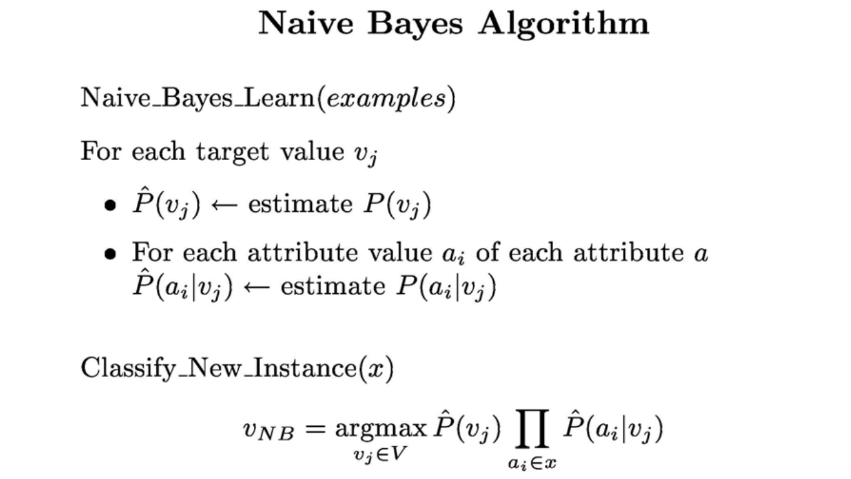
# Prediction using Naive Bayes Classifier

In [676]:
def naive_bayes_predict(X, prior, stats):
    predictions = []
    for x in X:
        class_probs = []
        for cls in range(len(prior)):
            mean = stats[cls]['mean']
            variance = stats[cls]['variance']
            class_prob = prior[cls] * np.prod(gaussian_probability(x, mean, variance))
            class_probs.append(class_prob)
        predictions.append(np.argmax(class_probs))
    return np.array(predictions)


# Calculating Accuracy of predictions

In [678]:
prior = calculate_prior(y)
stats = calculate_statistics(X, y)
predictions = naive_bayes_predict(X, prior, stats)

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

naive_bayes_accuracy = accuracy(y, predictions)
print(f'Naïve Bayes Classifier Accuracy: {naive_bayes_accuracy * 100:.2f}%')


Naïve Bayes Classifier Accuracy: 99.33%


# Visualization of decision boundaries and predictions

C:\Users\HOME\AppData\Local\Temp\ipykernel_6984\954842702.py:5: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[:, 0], X[:, 1], c=[colors[label] for label in predictions], edgecolors='white', s=50, marker='x', label='Predicted Labels', alpha=0.5)


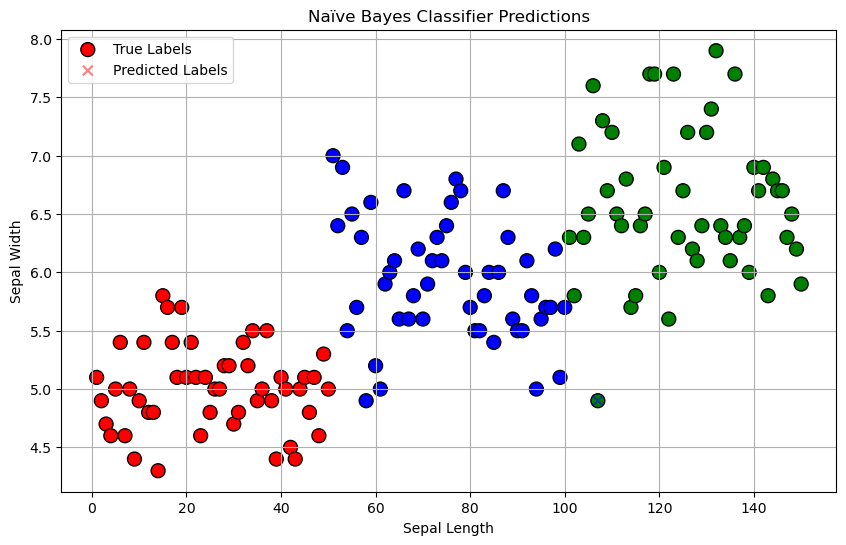

In [680]:
def plot_decision_boundaries(X, y, predictions):
    colors = {0: 'red', 1: 'blue', 2: 'green'}
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=[colors[label] for label in y], edgecolors='black', s=100, marker='o', label='True Labels')
    plt.scatter(X[:, 0], X[:, 1], c=[colors[label] for label in predictions], edgecolors='white', s=50, marker='x', label='Predicted Labels', alpha=0.5)
    plt.title('Naïve Bayes Classifier Predictions')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundaries(X, y, predictions)
